## 1. Point Processing

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Histogram of grayscale image

size : [512, 512]
[[140 140 140 ...  90  90  90]
 [140 140 140 ...  90  90  90]
 [135 135 143 ...  90  90  90]
 ...
 [109 109 113 ...  24  24  24]
 [106 106 110 ...  23  23  23]
 [106 106 110 ...  23  23  23]]


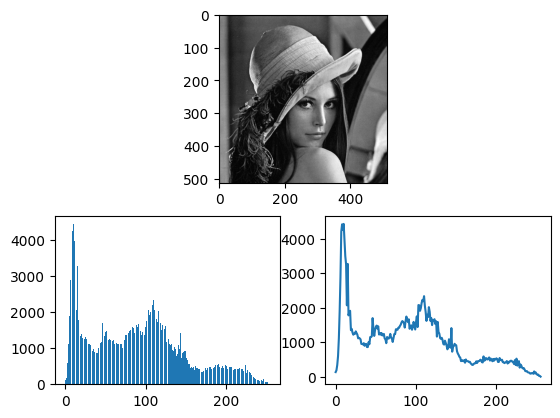

In [47]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

print(f'size : [{len(img)}, {len(img[0])}]')
print(img)

plt.subplot(2, 1, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 3)
plt.bar(range(len(hist)), hist.ravel())
plt.subplot(2, 2, 4)
plt.plot(hist)
plt.show()

2. Histogram of color image

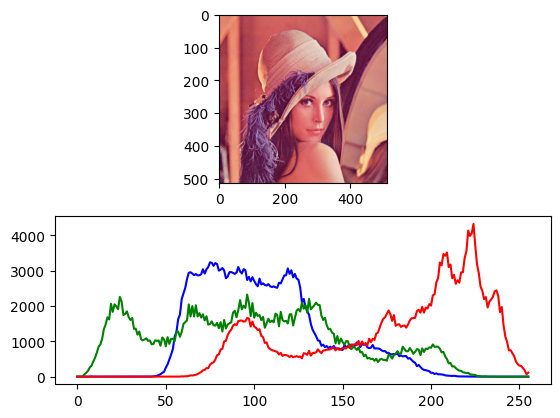

In [18]:
img = cv2.imread('images/01-lena-color.png', cv2.IMREAD_COLOR)
colors = ('b', 'g', 'r')

for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(2, 1, 2)
    plt.plot(hist, color=color)
    # plt.bar(range(len(hist)), hist.ravel(), color=color)

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

3. Histogram of color image to HSV

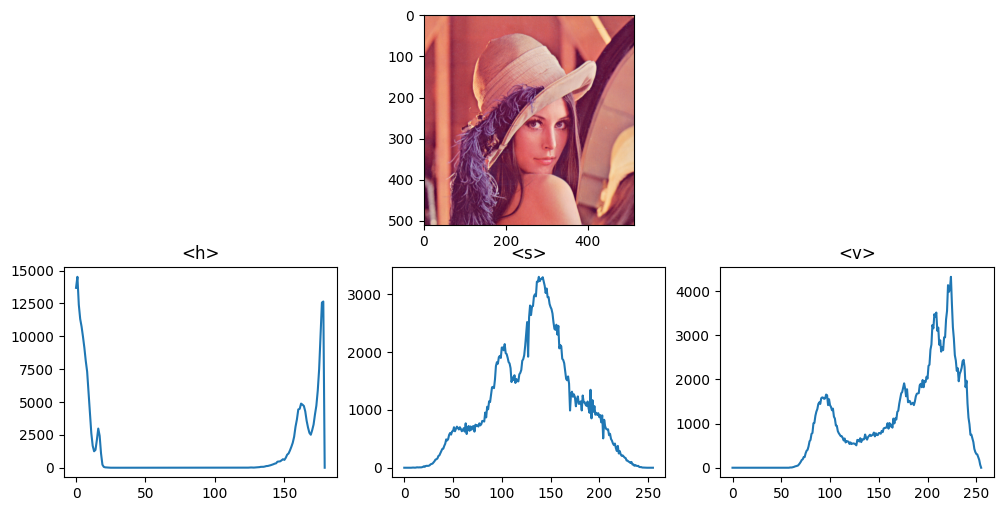

In [134]:
img = cv2.imread('images/01-lena-color.png', cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))

hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 179])
plt.subplot(2, 3, 4)
plt.plot(hist_h)
plt.title('<h>')

hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 255])
plt.subplot(2, 3, 5)
plt.plot(hist_s)
plt.title('<s>')

hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 255])
plt.subplot(2, 3, 6)
plt.plot(hist_v)
plt.title('<v>')

plt.show()

4. Arithmetic operations

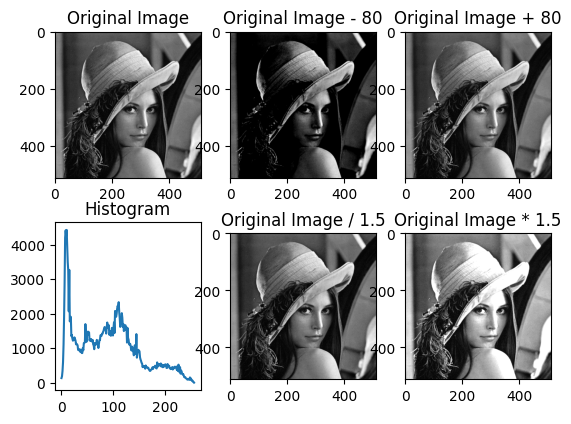

In [108]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

table_sub = np.zeros(256)
table_add = np.zeros(256)
table_div = np.zeros(256)
table_mul = np.zeros(256)

for i in range(256):
    if i - 80 >= 0:
        table_sub[i] = i - 80

for i in range(256):
    if i + 80 <= 255:
        table_add[i] = i + 80
    else:
        table_add[i] = i + 80

for i in range(256):
    table_div[i] = i // 1.5

for i in range(256):
    if i * 1.5 <= 255:
        table_mul[i] = i * 1.5
    else:
        table_mul[i] = 255

img_sub = cv2.LUT(img, table_sub)
img_add = cv2.LUT(img, table_add)
img_div = cv2.LUT(img, table_div)
img_mul = cv2.LUT(img, table_mul)

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Original Image - 80')
plt.imshow(img_sub, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Original Image + 80')
plt.imshow(img_add, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Histogram')
plt.plot(hist.ravel())

plt.subplot(2, 3, 5)
plt.title('Original Image / 1.5')
plt.imshow(img_div, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('Original Image * 1.5')
plt.imshow(img_mul, cmap='gray')

plt.show()

5. Logic operations

6. Simple gray level transformations

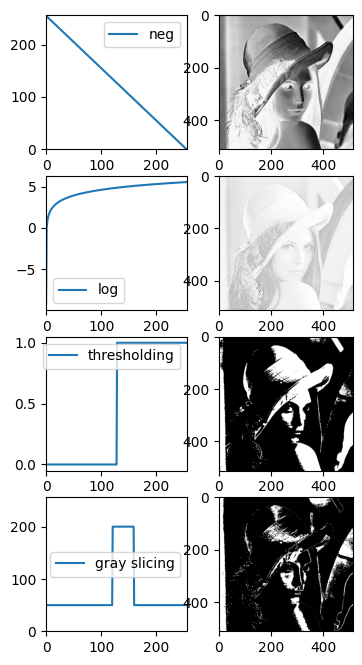

In [5]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

table_neg = np.zeros(256)
table_log = np.zeros(256)
table_thresholding = np.zeros(256)
table_gray_slicing = np.zeros(256)

for i in range(256):
    table_neg[i] = 255 - i

for i in range(256):
    delta = 1e-4
    table_log[i] = np.log(i + delta)

threshold = 128
for i in range(256):
    if i > threshold:
        table_thresholding[i] = 1

(a, b) = (120, 160)
for i in range(256):
    if i > 120 and i < 160:
        table_gray_slicing[i] = 200
    else:
        table_gray_slicing[i] = 50

img_neg = cv2.LUT(img, table_neg)
img_log = cv2.LUT(img, table_log)
img_thresholding = cv2.LUT(img, table_thresholding)
img_gray_slicing = cv2.LUT(img, table_gray_slicing)

plt.figure(figsize=(4, 8))

plt.subplot(4, 2, 1)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.plot(np.arange(256), table_neg, label='neg')
plt.legend()

plt.subplot(4, 2, 2)
plt.imshow(img_neg, cmap='gray')

plt.subplot(4, 2, 3)
plt.xlim((0, 256))
plt.plot(np.arange(256), table_log, label='log')
plt.legend()

plt.subplot(4, 2, 4)
plt.imshow(img_log, cmap='gray')

plt.subplot(4, 2, 5)
plt.xlim((0, 256))
plt.plot(np.arange(256), table_thresholding, label='thresholding')
plt.legend()

plt.subplot(4, 2, 6)
plt.imshow(img_thresholding, cmap='gray')

plt.subplot(4, 2, 7)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.plot(np.arange(256), table_gray_slicing, label='gray slicing')
plt.legend()

plt.subplot(4, 2, 8)
plt.imshow(img_gray_slicing, cmap='gray')

plt.show()

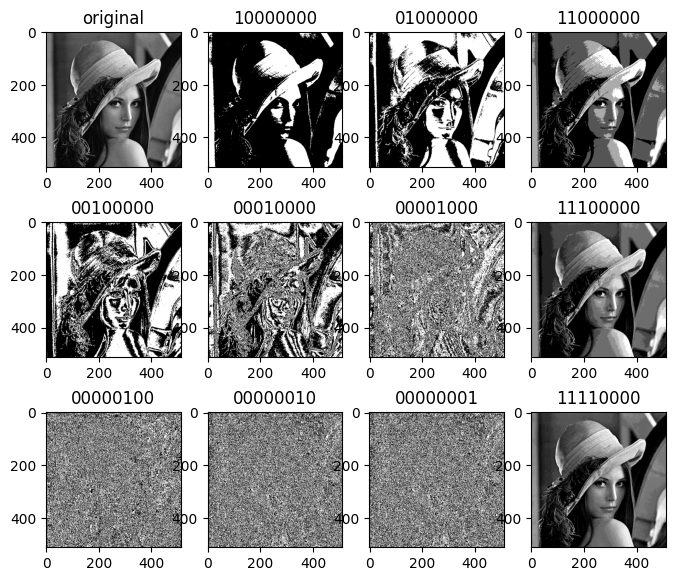

In [204]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 7))

img_bit1 = np.bitwise_and(img, 0b10000000)
img_bit2 = np.bitwise_and(img, 0b01000000)
img_bit3 = np.bitwise_and(img, 0b00100000)
img_bit4 = np.bitwise_and(img, 0b00010000)
img_bit5 = np.bitwise_and(img, 0b00001000)
img_bit6 = np.bitwise_and(img, 0b00000100)
img_bit7 = np.bitwise_and(img, 0b00000010)
img_bit8 = np.bitwise_and(img, 0b00000001)

img_bit12 = np.bitwise_and(img, 0b11000000)
img_bit123 = np.bitwise_and(img, 0b11100000)
img_bit1234 = np.bitwise_and(img, 0b11110000)


plt.subplot(3, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(3, 4, 2)
plt.imshow(img_bit1, cmap='gray')
plt.title('10000000')

plt.subplot(3, 4, 3)
plt.imshow(img_bit2, cmap='gray')
plt.title('01000000')

plt.subplot(3, 4, 4)
plt.imshow(img_bit12, cmap='gray')
plt.title('11000000')

plt.subplot(3, 4, 5)
plt.imshow(img_bit3, cmap='gray')
plt.title('00100000')

plt.subplot(3, 4, 6)
plt.imshow(img_bit4, cmap='gray')
plt.title('00010000')

plt.subplot(3, 4, 7)
plt.imshow(img_bit5, cmap='gray')
plt.title('00001000')

plt.subplot(3, 4, 8)
plt.imshow(img_bit123, cmap='gray')
plt.title('11100000')

plt.subplot(3, 4, 9)
plt.imshow(img_bit6, cmap='gray')
plt.title('00000100')

plt.subplot(3, 4, 10)
plt.imshow(img_bit7, cmap='gray')
plt.title('00000010')

plt.subplot(3, 4, 11)
plt.imshow(img_bit7, cmap='gray')
plt.title('00000001')

plt.subplot(3, 4, 12)
plt.imshow(img_bit1234, cmap='gray')
plt.title('11110000')

plt.show()

img_bit_plane_slicing = cv2.LUT(img, table_bit_plane_slicing)

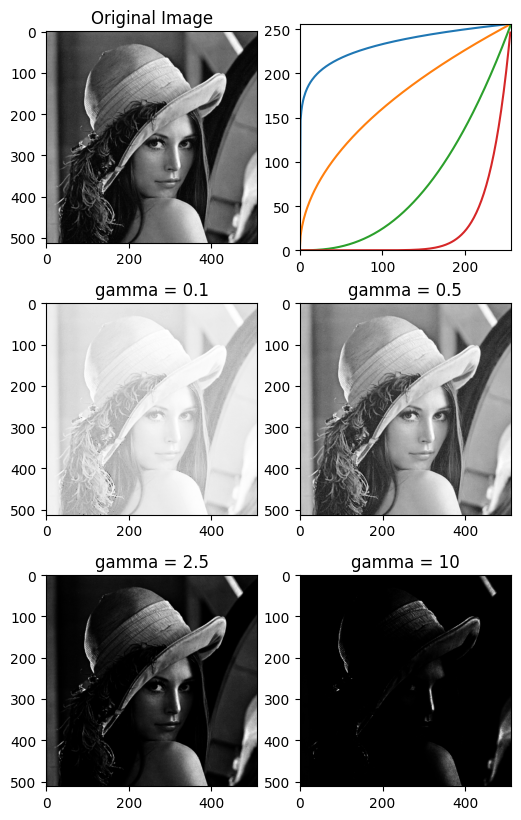

In [10]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

table_power_0_1 = np.zeros(256)
table_power_0_5 = np.zeros(256)
table_power_2_5 = np.zeros(256)
table_power_10 = np.zeros(256)

for i in range(256):
    table_power_0_1[i] = ((i / 256) ** 0.1) * 256

for i in range(256):
    table_power_0_5[i] = ((i / 256) ** 0.5) * 256

for i in range(256):
    table_power_2_5[i] = ((i / 256) ** 2.5) * 256

for i in range(256):
    table_power_10[i] = ((i / 256) ** 10) * 256

img_power_0_1 = cv2.LUT(img, table_power_0_1)
img_power_0_5 = cv2.LUT(img, table_power_0_5)
img_power_2_5 = cv2.LUT(img, table_power_2_5)
img_power_10 = cv2.LUT(img, table_power_10)

plt.figure(figsize=(6, 10))

plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(3, 2, 2)
plt.xlim((0, 256))
plt.ylim((0, 256))
plt.plot(np.arange(256), table_power_0_1, label='gray slicing')
plt.plot(np.arange(256), table_power_0_5, label='gray slicing')
plt.plot(np.arange(256), table_power_2_5, label='gray slicing')
plt.plot(np.arange(256), table_power_10, label='gray slicing')

plt.subplot(3, 2, 3)
plt.title('gamma = 0.1')
plt.imshow(img_power_0_1, cmap='gray')

plt.subplot(3, 2, 4)
plt.title('gamma = 0.5')
plt.imshow(img_power_0_5, cmap='gray')

plt.subplot(3, 2, 5)
plt.title('gamma = 2.5')
plt.imshow(img_power_2_5, cmap='gray')

plt.subplot(3, 2, 6)
plt.title('gamma = 10')
plt.imshow(img_power_10, cmap='gray')

plt.show()

7. Other gray level transformations